# Classification

1. Import libraries - pandas, sklearn.
2. Read the dataset.
3. Split the dataset into train and test.
4. Train the model using training data.
5. Test the model using test data.
6. Evaluate the model.

## Models used for classification
1. Naive Bayes (Classification)
2. K-Nearest Neighbour (Classification)
3. Logistic Regression (Classification)

Dataset used : https://www.kaggle.com/wenruliu/adult-income-dataset

In [2]:
# preprocessing
import numpy as np
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split

# model imports
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, f1_score

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('adult.csv')
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
data = pd.read_csv('adult.csv')

factor_cols = [
    'workclass', 'education', 'marital-status', 'occupation', 'relationship',
    'race', 'gender', 'native-country', 'income'
]

for col in factor_cols:
    print(pd.factorize(data[col])[1])
    data[col] = pd.factorize(data[col])[0]

# dropping educational-num as it gives no additional info
data = data.drop(['fnlwgt', 'educational-num'], axis=1)
data = data.rename(
    {'marital-status': 'marital_status',
     'capital-gain': 'capital_gain',
     'capital-loss': 'capital_loss',
     'hours-per-week': 'hours_per_week',
     'native-country': 'native_country'},
    axis=1
)
data

Index(['Private', 'Local-gov', '?', 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype='object')
Index(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th', 'Prof-school',
       '7th-8th', 'Bachelors', 'Masters', 'Doctorate', '5th-6th', 'Assoc-voc',
       '9th', '12th', '1st-4th', 'Preschool'],
      dtype='object')
Index(['Never-married', 'Married-civ-spouse', 'Widowed', 'Divorced',
       'Separated', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype='object')
Index(['Machine-op-inspct', 'Farming-fishing', 'Protective-serv', '?',
       'Other-service', 'Prof-specialty', 'Craft-repair', 'Adm-clerical',
       'Exec-managerial', 'Tech-support', 'Sales', 'Priv-house-serv',
       'Transport-moving', 'Handlers-cleaners', 'Armed-Forces'],
      dtype='object')
Index(['Own-child', 'Husband', 'Not-in-family', 'Unmarried', 'Wife',
       'Other-relative'],
      dtype='object')
Index(['Black', 'White', 'Asian-Pac

,age,workclass,education,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income
0,25,0,0,0,0,0,0,0,0,0,40,0,0
1,38,0,1,1,1,1,1,0,0,0,50,0,0
2,28,1,2,1,2,1,1,0,0,0,40,0,1
3,44,0,3,1,0,1,0,0,7688,0,40,0,1
4,18,2,3,0,3,0,1,1,0,0,30,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,0,2,1,9,4,1,1,0,0,38,0,0
48838,40,0,1,1,0,1,1,0,0,0,40,0,1
48839,58,0,1,2,7,3,1,1,0,0,40,0,0
48840,22,0,1,0,7,0,1,0,0,0,20,0,0


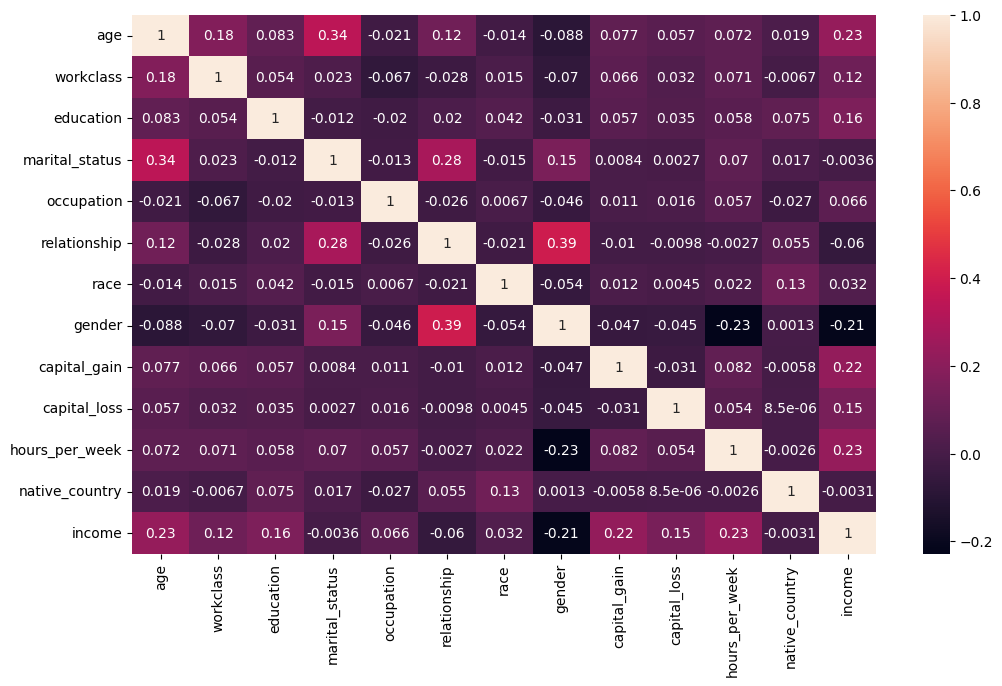

In [6]:
plt.figure(figsize=(12, 7))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [7]:
x = data.drop('income', axis=1)
x

,age,workclass,education,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country
0,25,0,0,0,0,0,0,0,0,0,40,0
1,38,0,1,1,1,1,1,0,0,0,50,0
2,28,1,2,1,2,1,1,0,0,0,40,0
3,44,0,3,1,0,1,0,0,7688,0,40,0
4,18,2,3,0,3,0,1,1,0,0,30,0
...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,0,2,1,9,4,1,1,0,0,38,0
48838,40,0,1,1,0,1,1,0,0,0,40,0
48839,58,0,1,2,7,3,1,1,0,0,40,0
48840,22,0,1,0,7,0,1,0,0,0,20,0


In [8]:
y = data['income']
y

0        0
1        0
2        1
3        1
4        0
        ..
48837    0
48838    1
48839    0
48840    0
48841    1
Name: income, Length: 48842, dtype: int64

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print('Train features  :', x_train.shape)
print('Train labels    :', y_train.shape)
print('\nTest features   :', x_test.shape)
print('Test labels     :', y_test.shape)

Train features  : (39073, 12)
Train labels    : (39073,)

Test features   : (9769, 12)
Test labels     : (9769,)


## Models

In [10]:
nb = GaussianNB().fit(x_train, y_train)
knn = KNeighborsClassifier().fit(x_train, y_train)
log_reg = LogisticRegression(max_iter=3000).fit(x_train, y_train)

c:\Users\ikath\OneDrive\GitHub\python-to-ai\venv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Evaluation

In [11]:
y_pred_nb = nb.predict(x_test)
y_pred_knn = knn.predict(x_test)
y_pred_log_reg = log_reg.predict(x_test)

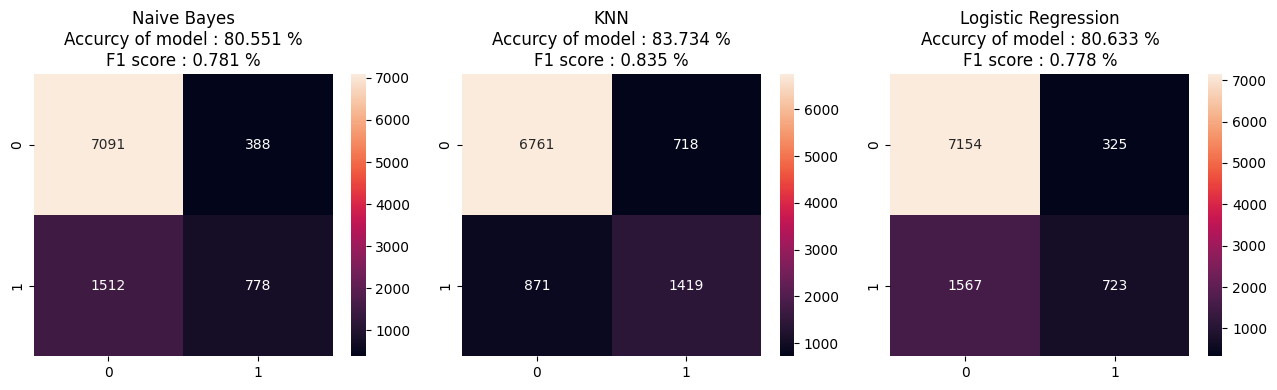

<Figure size 640x480 with 0 Axes>

In [12]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(13, 4))

sns.heatmap(
    confusion_matrix(y_test, y_pred_nb),
    annot=True, fmt="d", ax=ax1
)
ax1.set_title(
    "Naive Bayes\nAccurcy of model : %.3f %%\nF1 score : %.3f %%"
    % (nb.score(x_test, y_test)*100, f1_score(y_test, y_pred_nb, average='weighted'))
)

sns.heatmap(
    confusion_matrix(y_test, y_pred_knn),
    annot=True, fmt="d", ax=ax2
)
ax2.set_title(
    "KNN\nAccurcy of model : %.3f %%\nF1 score : %.3f %%" 
    % (knn.score(x_test, y_test)*100, f1_score(y_test, y_pred_knn, average='weighted'))
)

sns.heatmap(
    confusion_matrix(y_test, y_pred_log_reg),
    annot=True, fmt="d", ax=ax3
)
ax3.set_title(
    "Logistic Regression\nAccurcy of model : %.3f %%\nF1 score : %.3f %%"
    % (log_reg.score(x_test, y_test)*100, f1_score(y_test, y_pred_log_reg, average='weighted'))
)

plt.tight_layout()
plt.show()
plt.savefig(r"..\..\app\static\models\classification.png")

In [13]:
pickle.dump(
    nb,
    open(r"..\..\app\static\models\naive_bayes.sav", 'wb')
)

pickle.dump(
    knn,
    open(r"..\..\app\static\models\knn.sav", 'wb')
)

pickle.dump(
    log_reg,
    open(r"..\..\app\static\models\log_reg.sav", 'wb')
)